
# ASSIGNED PFR with inerts

The gas phase reaction $A + 2B -> 2D$ is carried out in an isothermal, plug-flow reactor at 5 atm. Species A, B and an inert I is fed to the reactor at 50 L/min at 328 K. The mole fraction of the inlet streams are:

<table border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="org-left" />

<col  class="org-right" />
</colgroup>
<tbody>
<tr>
<td class="org-left">x\_A</td>
<td class="org-right">0.2</td>
</tr>


<tr>
<td class="org-left">x\_B</td>
<td class="org-right">0.5</td>
</tr>


<tr>
<td class="org-left">x\_I</td>
<td class="org-right">0.3</td>
</tr>
</tbody>
</table>

The reaction rate is $r = 2.5 C_A^{0.5} C_B$ mol/(L min)

1.  Plot the volumetric flow in the reactor as a function of the reactor volume from V = 0L to 50L. Comment on whether your result makes sense.

2.  Determine the exit conversion of A.




# solution

We start with a cell containing the data we are given. The most important data to derive here is the initial pressures and molar flows.



In [2]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

R = 0.08205746 # L atm / (K mol)
P0 = 5.0       # atm
T = 328        # K
v0 = 50.0      # L / min

Pa0 = P0 * 0.2
Pb0 = P0 * 0.5
Pi0 = P0 * 0.3

Ci0 = Pi0 / R / T
Fi0 = Ci0 * v0

Fa0 = Pa0 / R / T * v0
Fb0 = Pb0 / R / T * v0
Fd0 = 0.0

Ft0 = Fa0 + Fb0 + Fi0

Next we define our differential mole balances. The most important thing here is to compute concentrations using the molar and volumetric flows because the molar flow is not constant. We also solve the equations and plot them here.

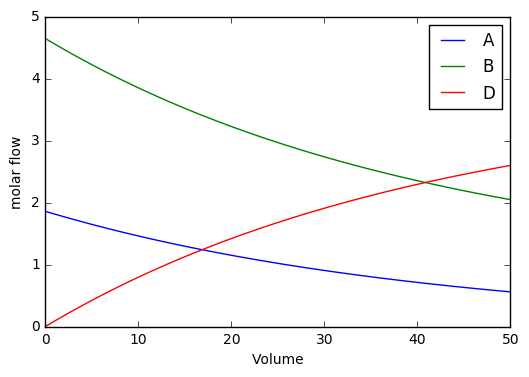

In [3]:
def ode(F, V):
    Fa, Fb, Fd = F

    Ft = Fa + Fb + Fd + Fi0

    v = v0 * Ft / Ft0

    Ca = Fa / v
    Cb = Fb / v

    r = 2.5 * Ca**0.5 * Cb

    ra = -r
    rb = -2 * r
    rd = 2 * r

    dFadV = ra
    dFbdV = rb
    dFddV = rd

    return [dFadV, dFbdV, dFddV]

F0 = [Fa0, Fb0, Fd0]

Vspan = np.linspace(0, 50)

sol = odeint(ode, F0, Vspan)

plt.plot(Vspan, sol)
plt.legend(['A', 'B', 'D'])
plt.xlabel('Volume')
plt.ylabel('molar flow')

Here we plot the volumetric flow.



Exit molar flow of A= 0.56 mol/min
Exit concentration = 0.01 M
Exit conversion = 0.70


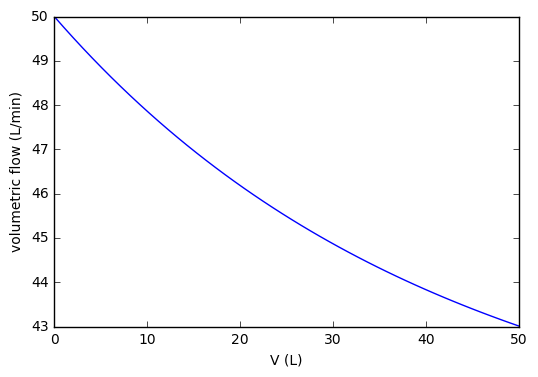

In [4]:
Fa, Fb, Fd = sol.T

Ft = Fa + Fb + Fd + Fi0
v = v0 * Ft / Ft0

plt.plot(Vspan, v)
plt.xlabel('V (L)')
plt.ylabel('volumetric flow (L/min)')

print('Exit molar flow of A= {:1.2f} mol/min'.format(Fa[-1]))
print('Exit concentration = {:1.2f} M'.format(Fa[-1] / v[-1]))
print('Exit conversion = {:1.2f}'.format((Fa0 - Fa[-1]) / Fa0))

The volumetric flow decreases, as expected because the molar flow decreases. Based on stoichiometry, we go from 3 moles to two moles.

